                    PROGETTO ICON
                      A.A. 22/23
    'Predizioni risultati partite di Pallacanestro'*

1. *Creazione del dataset* a partire dalla seguente pagina:
https://www.legabasket.it/

In [2]:
pip install bs4

2. Vengono trovate tutte le partite del campionato e vengono inseriti i link all'interno del vettore *link_parite*.

In [2]:
import requests
import re
import os
from bs4 import BeautifulSoup

In [32]:
URL = "https://www.legabasket.it/lba/6/calendario/summary-table"
URL21 = "https://www.legabasket.it/lba/6/calendario/summary-table?s=2021&c="
URL20 = "https://www.legabasket.it/lba/6/calendario/summary-table?s=2020&c=" #NOn funziona
URL19 = "https://www.legabasket.it/lba/6/calendario/summary-table?s=2019&c=" #Non funziona
# 2. scaricare i dati dietro l'URL
tabellone = requests.get(URL).text

# 3. Selezionare il codice che indica le partite, cioè a partire dal tbody.
link_partite = []
soup = BeautifulSoup(tabellone, 'html.parser')
links = soup.find_all('a', class_='text-decoration-none')

# funzione per filtrare i link che contengono "/game"
def filter_link(link):
    return '/game/' in link['href']

# utilizzare filter() per selezionare solo i link che contengono "/game"
filtered_links = list(filter(filter_link, links))
for link in filtered_links:
    link_partite.append('https://www.legabasket.it'+ link['href'])

print(link_partite)

['https://www.legabasket.it/game/23450', 'https://www.legabasket.it/game/23507', 'https://www.legabasket.it/game/23395', 'https://www.legabasket.it/game/23493', 'https://www.legabasket.it/game/23436', 'https://www.legabasket.it/game/23542', 'https://www.legabasket.it/game/23380', 'https://www.legabasket.it/game/23405', 'https://www.legabasket.it/game/23365', 'https://www.legabasket.it/game/23601', 'https://www.legabasket.it/game/23421', 'https://www.legabasket.it/game/23528', 'https://www.legabasket.it/game/23472', 'https://www.legabasket.it/game/23576', 'https://www.legabasket.it/game/23561', 'https://www.legabasket.it/game/23530', 'https://www.legabasket.it/game/23402', 'https://www.legabasket.it/game/23476', 'https://www.legabasket.it/game/23515', 'https://www.legabasket.it/game/23373', 'https://www.legabasket.it/game/23500', 'https://www.legabasket.it/game/23446', 'https://www.legabasket.it/game/23571', 'https://www.legabasket.it/game/23588', 'https://www.legabasket.it/game/23433',

3. Viene scaricato l'andamento delle partite dalla sezione *'play by play'* della pagina

In [35]:
playbyplay_list = link_partite.copy()
i = int(0)
for link in  playbyplay_list:
    playbyplay_list[i] = link + '/playbyplay'
    i = i+1
print(playbyplay_list)

['https://www.legabasket.it/game/23450/playbyplay', 'https://www.legabasket.it/game/23507/playbyplay', 'https://www.legabasket.it/game/23395/playbyplay', 'https://www.legabasket.it/game/23493/playbyplay', 'https://www.legabasket.it/game/23436/playbyplay', 'https://www.legabasket.it/game/23542/playbyplay', 'https://www.legabasket.it/game/23380/playbyplay', 'https://www.legabasket.it/game/23405/playbyplay', 'https://www.legabasket.it/game/23365/playbyplay', 'https://www.legabasket.it/game/23601/playbyplay', 'https://www.legabasket.it/game/23421/playbyplay', 'https://www.legabasket.it/game/23528/playbyplay', 'https://www.legabasket.it/game/23472/playbyplay', 'https://www.legabasket.it/game/23576/playbyplay', 'https://www.legabasket.it/game/23561/playbyplay', 'https://www.legabasket.it/game/23530/playbyplay', 'https://www.legabasket.it/game/23402/playbyplay', 'https://www.legabasket.it/game/23476/playbyplay', 'https://www.legabasket.it/game/23515/playbyplay', 'https://www.legabasket.it/gam

In [36]:
import unidecode
def clean_names(names_string):
    cleaned_names = unidecode.unidecode(names_string)
    cleaned_names = cleaned_names.lower()
    cleaned_names = ''.join(e for e in cleaned_names if e.isalnum() or e == ' ')
    cleaned_names = cleaned_names.replace(".", "")
    cleaned_names = cleaned_names.replace("\n", "")
    cleaned_names = '_'.join(cleaned_names.split())
    return cleaned_names

4. Creazione di un *dizionario* in cui inserire i *nomi delle squadre* e il rispettivo *codice*

In [10]:
URL = 'https://www.legabasket.it/lba/3/squadre'
squadre = requests.get(URL).text
soup = BeautifulSoup(squadre, 'html.parser')
teams = []
teams = [info.text for info in soup.find_all('h5', {'class': 'card-title team-name', 'itemprop': 'name headline'})]
i = int(0)
diz_squadre = {}
for team in teams:
    teams[i] = clean_names(teams[i])
    diz_squadre.update({i : teams[i]})
    i = i+1

with open("dataset/squadre.txt", "w") as file:
    for elemento in teams:
        file.write(str(elemento) + "\n")
print(diz_squadre)

{0: 'banco_di_sardegna_sassari', 1: 'bertram_yachts_derthona_tortona', 2: 'carpegna_prosciutto_pesaro', 3: 'dolomiti_energia_trentino', 4: 'ea7_emporio_armani_milano', 5: 'germani_brescia', 6: 'gevi_napoli_basket', 7: 'givova_scafati', 8: 'happy_casa_brindisi', 9: 'nutribullet_treviso_basket', 10: 'openjobmetis_varese', 11: 'pallacanestro_trieste', 12: 'tezenis_verona', 13: 'umana_reyer_venezia', 14: 'unahotels_reggio_emilia', 15: 'virtus_segafredo_bologna'}


5. Vengono covertite le azioni con degli acronimi per rendere il dataset di più facile lettura

(*Serviranno in seguito per il calcolo di determinate variabili per il calcolo di statistiche*)

In [6]:
def converti_azioni(event_list):
    for i in range(len(event_list)):
      if "Fallocommesso" in event_list[i] : event_list[i] = "FF"
      elif "FalloSubito" in event_list[i] : event_list[i] = "FS"
      elif "Pallapersa" in event_list[i] : event_list[i] = "PP"
      elif "Pallarecuperata" in event_list[i] : event_list[i] = "PR"
      elif "Rimbalzodifensiv" in event_list[i] : event_list[i] = "RD"
      elif "Rimbalzooffensiv" in event_list[i] : event_list[i] = "RO"
      elif "StoppataSubita" in event_list[i] : event_list[i] = "SS"
      elif "Stoppata" in event_list[i] : event_list[i] = "SD"
      elif "2puntisegnato" in event_list[i] : event_list[i] = "T2+"
      elif "3puntisegnato" in event_list[i] : event_list[i] = "T3+"
      elif "Tiroliberosegnato" in event_list[i] : event_list[i] = "T1+"
      elif "2puntisbagliato" in event_list[i] : event_list[i] = "T2-"
      elif "3puntisbagliato" in event_list[i] : event_list[i] = "T3-"
      elif "Tiroliberosbagliato" in event_list[i] : event_list[i] = "T1-"
      elif "Ingresso" in event_list[i] : event_list[i] = "IN"
      elif "Uscita" in event_list[i] : event_list[i] = "OUT"
      elif "Assist" in event_list[i] : event_list[i] = "AS"
      elif "InizioTempo" in event_list[i] : event_list[i] = "SQ"
      elif "FineTempo" in event_list[i] : event_list[i] = "EQ"
      elif "TimeOut" in event_list[i] : event_list[i] = "TO"
      elif "Rimbalz" in event_list[i] : event_list[i] = "RT"
      elif "Pallacontesa" in event_list[i] : event_list[i] = ""
      elif "Pallerecuperate" in event_list[i] : event_list[i] = "PR"
    return event_list

6. Creazione classi *'Partita'*, *'Evento'* e *'Giocatore'*

In [7]:
from Partita_class import *
from ProfiloGiocatore_class import *

7. Creazione funzione per la creazione di una *'partita'*

In [48]:
def playbyplay(URL):
    partita = requests.get(URL).text
    soup = BeautifulSoup(partita, 'html.parser')

    num_home_player = []
    num_guest_player = []

    #DATI FISSI
    #Squadra casa
    home = clean_names(soup.find('h5', class_='text-uppercase text-start mt-5').text.replace("  ", ""))

    #Squadra ospite
    guest = clean_names(soup.find('h5', class_='text-uppercase text-end mt-5').text.replace("  ", ""))

    if soup.find('button', {'class':'nav-link', 'id':'playbyplay-tab'}) == None:
        return Partita(home, guest, "0", "0")

    #DATI VARIABILI

    #Estrarre il punteggio casa
    score_home = [info.text.replace(" ", "") for info in soup.find_all('div', class_='col score big-shoulders text-orange')]

    #Estrarre il punteggio ospite
    score_guest = [info.text.replace(" ", "") for info in soup.find_all('div', class_='col score big-shoulders text-secondary')]

    #Estrarre il quarto
    quarter = [info.text.replace(" ", "").replace("\n", "") for info in soup.find_all('div', class_='quarter')]

    #Estrarre il tempo
    time = [info.text.replace(" ", "").replace("\n", "").replace(":", ".") for info in soup.find_all('div', class_='col-12 text-center')]

    #AZIONE OSPITE
    #Estrarre lista eventi ospite
    event_guest = [info.text.replace(" ", "").replace("\n", "") for info in soup.find_all('div', class_='col d-flex align-items-center justify-content-end event')]
    event_guest_player = [info.text.replace("\n", " ").replace("\xa0", " ").replace("  ", "") for info in soup.find_all('div', class_='col col-auto d-flex align-items-center big-shoulders player')]

    #AZIONE CASA
    #Estrarre lista eventi casa
    event_home = [info.text.replace(" ", "").replace("\n", "") for info in soup.find_all('div', class_='col d-flex align-items-center event')]
    event_home_player = [info.text.replace("\xa0", " ").replace("  ", "").replace("\n", "") for info in soup.find_all('div', class_='col d-flex align-items-center col-auto big-shoulders player')]

    event_guest = converti_azioni(event_guest)
    event_home = converti_azioni(event_home)

    #Numero giocatore casa/ospite
    i = int(0)
    for player in event_home_player:
        num_home_player.append(trova_numero(event_home_player[i]))
        num_guest_player.append(trova_numero(event_guest_player[i]))
        i= i+1

    #Elimina numero giocatore casa/ospite
    i = int(0)
    for player in event_home_player:
        event_home_player[i] = clean_names(re.sub(r'\d+','', event_home_player[i]))
        event_guest_player[i] = clean_names(re.sub(r'\d+','', event_guest_player[i]))
        i= i+1

    #CREAZIONE INCONTRO
    incontro = Partita(home, guest, score_max(score_home), score_max(score_guest))
    i = int(0)
    for avvenimento in score_home:
        incontro.eventi.append(Evento(score_home[i], score_guest[i], event(event_guest,event_home, i),quarter[i],time[i],Giocatore(nome_g(i,event_home_player,event_guest_player),numero_g(event_home, i, num_home_player, num_guest_player),squadra(event_home,i,home ,guest))))
        i = i+1

    incontro.eventi = list(reversed(incontro.eventi))
    return incontro

8. Funzioni di supporto

In [47]:
def event(event_guest,event_home, pos):
    if event_guest[pos] != "":
      return event_guest[pos]
    else: return event_home[pos]
def squadra(event_home,pos,home,guest):
    if event_home[pos] != "":
      return home
    else: return guest
def numero_g(event_home, pos, num_home_player, num_guest_player):
    if event_home[pos] != "":
      return num_home_player[pos]
    else: return num_guest_player[pos]
def nome_g(pos,event_home_player,event_guest_player):
    if event_home_player[pos] != "":
      return event_home_player[pos]
    else: return event_guest_player[pos]
def trova_numero(string):
    match = re.search(r'\d+', string)
    if match:
        return match.group().replace("  ", "")
    else:
        return " "
def score_max(list):
    score_max = 0
    for element in list:
        if int(element) > score_max:
            score_max = int(element)
    return score_max

Scraper tabella giocatori

In [ ]:
URL = "https://www.legabasket.it/lba/4/giocatori"
# 2. scaricare i dati dietro l'URL
giocatori = requests.get(URL).text

# 3. Selezionare il codice che indica le partite, cioè a partire dal tbody.
link_giocatori = []
soup = BeautifulSoup(giocatori, 'html.parser')
links = soup.find_all('a', class_='card card-player col-3 col-sm-4 col-lg-2')

# funzione per filtrare i link che contengono "/game"
def filter_link(link):
    return link['href']

# utilizzare filter() per selezionare solo i link che contengono "/game"
filtered_links = list(filter(filter_link, links))
for link in filtered_links:
    link_giocatori.append('https://www.legabasket.it'+ link['href'])

print(link_giocatori)

I valori nel campo medie sono salvate con l'ordine nell immagine: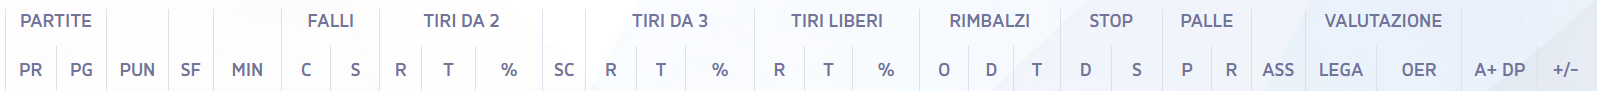

Dove: O = offensivi, D = difensivi, T = tentati, R = realizzati,palle P = perse, palle R = recuperate

In [ ]:
def to_lower_and_dashed(s):
    return s.lower().replace("-","_").replace(".","_").replace(" ", "_").replace("'","_").replace("ò","o")
def crea_Giocatore(URL):
    URL_giocatore = requests.get(URL).text
    soup = BeautifulSoup(URL_giocatore, 'html.parser')

    numero_giocatore = soup.find('h1', {'class':'text-uppercase mb-5', 'itemprop':'name'}).find("span", class_="text-orange").text
    parte_prima, nome_giocatore = os.path.split(URL)
    nome_giocatore = nome_giocatore.replace("-","_")
    squadra = clean_names(soup.find('div', class_ = "team-logo col-sm-4 col-lg-12 mb-1 mb-lg-3 mb-xl-5").find("img")["title"])
    ruolo = soup.find('strong', class_ = "player-role text-orange").text.split("/")[0]
    if ruolo == "Playmaker":
        ruolo = "Play"
    if ruolo=="-":
        ruolo = None
    altezza =  soup.find('span', {'class':'numero', 'itemprop':'height'}).text

    giocatore = ProfiloGiocatore(nome_giocatore, numero_giocatore, to_lower_and_dashed(squadra), ruolo, altezza)
    medie= []
    try:
        m = soup.find("td", class_ = "result big-shoulders",text="MEDIE").find_parent("tr")
        for td in m.find_all("td"):
            try:
                medie.append(float(td.text.replace(",", ".").replace("NaN","0.0")))
            except ValueError:
                pass

        giocatore.minuti = medie[4]
        giocatore.FALLI_C = medie[5]
        giocatore.FALLI_S = medie[6]
        giocatore.T2_R = medie[7]
        giocatore.T2_T = medie[8]
        giocatore.T2_PER = medie[9]
        giocatore.T3_R = medie[11]
        giocatore.T3_T = medie[12]
        giocatore.T3_PER = medie[13]
        giocatore.T1_R = medie[14]
        giocatore.T1_T = medie[15]
        giocatore.T1_PER = medie[16]
        giocatore.RIM_O = medie[17]
        giocatore.RIM_D = medie[18]
        giocatore.RIM_T = medie[19]
        giocatore.STOP_D = medie[20]
        giocatore.STOP_S = medie[21]
        giocatore.PALLE_P = medie[22]
        giocatore.PALLE_R = medie[24]
        giocatore.ASS = medie[25]
    except: pass
    return giocatore

In [ ]:
import csv
i = int()
giocatori = []
with open("dataset\giocatori.csv", "w", newline="") as file:
    scrittore = csv.writer(file)
    scrittore.writerow(["nome_giocatore", "numero_giocatore", "squadra","ruolo","altezza","minuti", "falli_c", "falli_s", "t2_r", "t2_t", "t2_per", "t3_r", "t3_t", "t3_per", "t1_r", "t1_t", "t1_per", "rim_o", "rim_d", "rim_t", "stop_d", "stop_s", "palle_p", "palle_r", "ass"])
    for gio in link_giocatori:
      giocatori.append(crea_Giocatore(link_giocatori[i]))
      scrittore.writerow(giocatori[i].__iter__())
      print("giocatore: "+ str(giocatori[i].nome_giocatore) + " salvato")
      i = i+1

Main scraper per salvare le partite in un file *.json*

In [49]:
i = int()
partite = []
for par in playbyplay_list:
    partite.append(playbyplay(playbyplay_list[i]))
    print ("partita:"+ str(i) + " salvata")
    i= i+1
with open("dataset\partita21.json", "w") as file:
   json.dump(partite, file, cls=PartitaEncoder)

partita:0 salvata
partita:1 salvata
partita:2 salvata
partita:3 salvata
partita:4 salvata
partita:5 salvata
partita:6 salvata
partita:7 salvata
partita:8 salvata
partita:9 salvata
partita:10 salvata
partita:11 salvata
partita:12 salvata
partita:13 salvata
partita:14 salvata
partita:15 salvata
partita:16 salvata
partita:17 salvata
partita:18 salvata
partita:19 salvata
partita:20 salvata
partita:21 salvata
partita:22 salvata
partita:23 salvata
partita:24 salvata
partita:25 salvata
partita:26 salvata
partita:27 salvata
partita:28 salvata
partita:29 salvata
partita:30 salvata
partita:31 salvata
partita:32 salvata
partita:33 salvata
partita:34 salvata
partita:35 salvata
partita:36 salvata
partita:37 salvata
partita:38 salvata
partita:39 salvata
partita:40 salvata
partita:41 salvata
partita:42 salvata
partita:43 salvata
partita:44 salvata
partita:45 salvata
partita:46 salvata
partita:47 salvata
partita:48 salvata
partita:49 salvata
partita:50 salvata
partita:51 salvata
partita:52 salvata
par

In [ ]:
import csv
import json
squadre = {}
with open("dataset/giocatori.csv") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        nome, _, squadra, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _ = row
        if squadra not in squadre:
            squadre[squadra] = []
        squadre[squadra].append(nome)
with open("dataset/squadre.json", "w") as jsonfile:
    json.dump(squadre, jsonfile)